In [1]:
import env_wrapper
import gymnasium
from stochastic_atari import create_stochasticity_profile


def build_single_env(env_name, image_size, seed, stochasticity_config):
    skip=4
    env = gymnasium.make(env_name, full_action_space=False, render_mode="rgb_array", frameskip=1, repeat_action_probability=0.0)
    game_name = env_name[4:-3] # Remove first 4 characters ("ALE/") and last 3 characters ("-v5")
    stochasticity_config['intrinsic_stochasticity']['action_independent_concept_drift']['skip'] = skip
    stochasticity_profile = create_stochasticity_profile(game_name=game_name, type=stochasticity_config['stochasticity_type'], config=stochasticity_config)
    env = stochasticity_profile.get_env(env)
    env = env_wrapper.SeedEnvWrapper(env, seed=seed)
    env = env_wrapper.MaxLast2FrameSkipWrapper(env, skip=skip)
    env = gymnasium.wrappers.ResizeObservation(env, shape=(image_size, image_size))
    env = env_wrapper.LifeLossInfo(env)
    return env


def build_vec_env(env_name, image_size, num_envs, seed, stochasticity_config):
    # lambda pitfall refs to: https://python.plainenglish.io/python-pitfalls-with-variable-capture-dcfc113f39b7
    def lambda_generator(env_name, image_size):
        return lambda: build_single_env(env_name, image_size, seed, stochasticity_config)
    env_fns = []
    env_fns = [lambda_generator(env_name, image_size) for i in range(num_envs)]
    vec_env = gymnasium.vector.AsyncVectorEnv(env_fns=env_fns)
    return vec_env

In [16]:
env_name = 'ALE/BankHeist-v5'

In [84]:
stochasticity_config = {'stochasticity_type': 5,
                        'intrinsic_stochasticity': {
                            'action_dependent': {
                                'stochastic_action_prob': 0.5
                                },
                            'action_independent_concept_drift': {
                                'temporal_threshold': 5,
                                'temporal_mode': 'cyclic',
                                'secondary_concept_type': 5,
                                },
                            'action_independent_random': {
                                'mode': '3',
                                'random_stochasticity_prob': 0.25,
                                }
                            },
                        'partial_observation': {
                            'type': 'blackout',
                            'mode': '4', 
                            'prob': 0.75, 
                            },
                        }


In [85]:
env = build_single_env(env_name, image_size=64, seed=0, stochasticity_config=stochasticity_config)

In [86]:
import matplotlib.pyplot as plt
import numpy as np

def plot_frame(obs, label=''):
    """Plot a frame without going into interactive mode"""
    # Create a new figure with non-interactive backend for this plot
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.imshow(obs)
    ax.set_title(f'Observation {label}')
    ax.axis('off')
    plt.tight_layout()
    plt.show(block=True)  # Don't block, just display
    plt.close()  # Close the figure to free memory

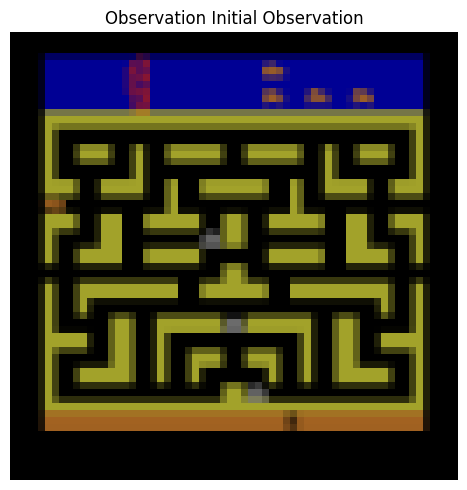

In [87]:
obs, info = env.reset()
plot_frame(obs, 'Initial Observation')


In [88]:
# SKIP AHEAD TO (238/4)TH STEP for gopher
for i in range(238//4):
    obs, _, _, _, _ = env.step(1)

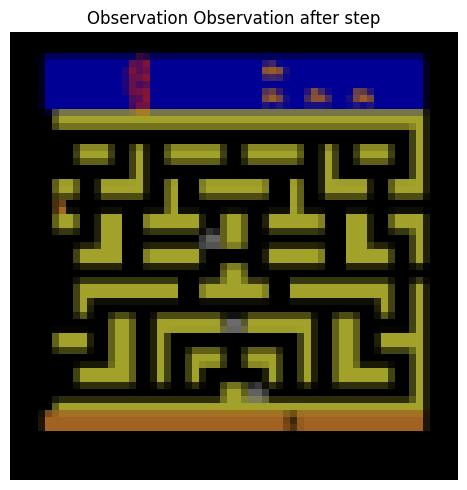

In [99]:
obs, reward, terminated, truncated, info = env.step(0)
plot_frame(obs, 'Observation after step')

In [ ]:
actions = [np.int64(2),
 np.int64(0),
 np.int64(2),
 np.int64(2),
 np.int64(0),
 np.int64(0),
 np.int64(1),
 np.int64(3),
 np.int64(0),
 np.int64(2),
 np.int64(3),
 np.int64(1),
 np.int64(0),
 np.int64(3),
 np.int64(3),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(2),
 np.int64(3),
 np.int64(3),
 np.int64(2),
 np.int64(1),
 np.int64(0),
 np.int64(2),
 np.int64(0),
 np.int64(1),
 np.int64(3),
 np.int64(2),
 np.int64(3),
 np.int64(1),
 np.int64(1),
 np.int64(2),
 np.int64(1),
 np.int64(0),
 np.int64(3),
 np.int64(1),
 np.int64(1),
 np.int64(2),
 np.int64(3),
 np.int64(2),
 np.int64(3),
 np.int64(0),
 np.int64(0),
 np.int64(3),
 np.int64(2),
 np.int64(1),
 np.int64(3),
 np.int64(2),
 np.int64(0),
 np.int64(1),
 np.int64(2),
 np.int64(3),
 np.int64(0),
 np.int64(1),
 np.int64(3),
 np.int64(1),
 np.int64(2),
 np.int64(2),
 np.int64(3),
 np.int64(0),
 np.int64(3),
 np.int64(1),
 np.int64(3),
 np.int64(1),
 np.int64(3),
 np.int64(1),
 np.int64(2),
 np.int64(2),
 np.int64(2),
 np.int64(3),
 np.int64(3),
 np.int64(2),
 np.int64(3),
 np.int64(3),
 np.int64(2),
 np.int64(1),
 np.int64(3),
 np.int64(1),
 np.int64(0),
 np.int64(2),
 np.int64(2),
 np.int64(0),
 np.int64(1),
 np.int64(3),
 np.int64(0),
 np.int64(0),
 np.int64(2),
 np.int64(2),
 np.int64(2),
 np.int64(3),
 np.int64(2),
 np.int64(3),
 np.int64(3),
 np.int64(3),
 np.int64(3),
 np.int64(0),
 np.int64(0),
 np.int64(3),
 np.int64(0),
 np.int64(0),
 np.int64(2),
 np.int64(3),
 np.int64(3),
 np.int64(0),
 np.int64(3),
 np.int64(1),
 np.int64(2),
 np.int64(2),
 np.int64(2),
 np.int64(2),
 np.int64(3),
 np.int64(1),
 np.int64(2),
 np.int64(2),
 np.int64(0),
 np.int64(3),
 np.int64(0),
 np.int64(3),
 np.int64(0),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(3),
 np.int64(0),
 np.int64(0),
 np.int64(2),
 np.int64(2),
 np.int64(2),
 np.int64(1),
 np.int64(3),
 np.int64(1),
 np.int64(0),
 np.int64(3),
 np.int64(3),
 np.int64(0),
 np.int64(3),
 np.int64(3),
 np.int64(1),
 np.int64(0),
 np.int64(1),
 np.int64(1),
 np.int64(0),
 np.int64(2),
 np.int64(3),
 np.int64(0),
 np.int64(2),
 np.int64(3),
 np.int64(1),
 np.int64(3),
 np.int64(3),
 np.int64(2),
 np.int64(0),
 np.int64(1),
 np.int64(1),
 np.int64(0),
 np.int64(0),
 np.int64(2),
 np.int64(2),
 np.int64(3),
 np.int64(3),
 np.int64(2),
 np.int64(0),
 np.int64(1),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(1),
 np.int64(3),
 np.int64(2),
 np.int64(1),
 np.int64(0),
 np.int64(3),
 np.int64(0),
 np.int64(3),
 np.int64(1),
 np.int64(3),
 np.int64(1),
 np.int64(0),
 np.int64(3),
 np.int64(1),
 np.int64(1),
 np.int64(0),
 np.int64(0),
 np.int64(3),
 np.int64(1),
 np.int64(3),
 np.int64(1),
 np.int64(3),
 np.int64(1),
 np.int64(3),
 np.int64(1),
 np.int64(3),
 np.int64(0),
 np.int64(0),
 np.int64(1),
 np.int64(3),
 np.int64(2),
 np.int64(3),
 np.int64(2),
 np.int64(1),
 np.int64(3),
 np.int64(1),
 np.int64(2),
 np.int64(0),
 np.int64(3),
 np.int64(0),
 np.int64(0),
 np.int64(2),
 np.int64(2),
 np.int64(3),
 np.int64(0),
 np.int64(3),
 np.int64(2),
 np.int64(0),
 np.int64(1),
 np.int64(1),
 np.int64(2),
 np.int64(0),
 np.int64(2),
 np.int64(0),
 np.int64(1),
 np.int64(0),
 np.int64(0),
 np.int64(2),
 np.int64(0),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(2),
 np.int64(3),
 np.int64(1),
 np.int64(2),
 np.int64(3),
 np.int64(1),
 np.int64(3),
 np.int64(3),
 np.int64(2),
 np.int64(1),
 np.int64(2),
 np.int64(3),
 np.int64(2),
 np.int64(3),
 np.int64(2),
 np.int64(3),
 np.int64(2),
 np.int64(1),
 np.int64(0),
 np.int64(1),
 np.int64(3),
 np.int64(1),
 np.int64(1),
 np.int64(0),
 np.int64(3),
 np.int64(2),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(2),
 np.int64(3),
 np.int64(2),
 np.int64(2),
 np.int64(2),
 np.int64(3),
 np.int64(1),
 np.int64(3),
 np.int64(2),
 np.int64(3),
 np.int64(0),
 np.int64(1),
 np.int64(3),
 np.int64(3),
 np.int64(3),
 np.int64(3),
 np.int64(3),
 np.int64(0),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(3),
 np.int64(2),
 np.int64(3),
 np.int64(0),
 np.int64(0),
 np.int64(1),
 np.int64(1),
 np.int64(3),
 np.int64(0),
 np.int64(0),
 np.int64(3),
 np.int64(1),
 np.int64(2),
 np.int64(2),
 np.int64(0),
 np.int64(2),
 np.int64(0),
 np.int64(3),
 np.int64(2),
 np.int64(2),
 np.int64(3),
 np.int64(3),
 np.int64(1),
 np.int64(3),
 np.int64(0),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(3),
 np.int64(2),
 np.int64(2),
 np.int64(2),
 np.int64(3),
 np.int64(3),
 np.int64(2),
 np.int64(2),
 np.int64(2),
 np.int64(0),
 np.int64(2),
 np.int64(2),
 np.int64(1),
 np.int64(2),
 np.int64(1),
 np.int64(0),
 np.int64(3),
 np.int64(3),
 np.int64(2),
 np.int64(2),
 np.int64(2),
 np.int64(0),
 np.int64(2),
 np.int64(1),
 np.int64(2),
 np.int64(0),
 np.int64(2),
 np.int64(2),
 np.int64(2),
 np.int64(2),
 np.int64(2),
 np.int64(3),
 np.int64(3),
 np.int64(2),
 np.int64(3),
 np.int64(0),
 np.int64(2),
 np.int64(1),
 np.int64(3),
 np.int64(1),
 np.int64(3),
 np.int64(1),
 np.int64(3),
 np.int64(1),
 np.int64(3),
 np.int64(3),
 np.int64(0),
 np.int64(0),
 np.int64(1),
 np.int64(3),
 np.int64(1),
 np.int64(2),
 np.int64(2),
 np.int64(1),
 np.int64(3),
 np.int64(0),
 np.int64(2),
 np.int64(1),
 np.int64(2),
 np.int64(1),
 np.int64(0),
 np.int64(2),
 np.int64(2),
 np.int64(1),
 np.int64(3),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(3),
 np.int64(0),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(3),
 np.int64(3),
 np.int64(2),
 np.int64(1),
 np.int64(0),
 np.int64(2),
 np.int64(2),
 np.int64(0),
 np.int64(1),
 np.int64(1),
 np.int64(0),
 np.int64(2),
 np.int64(0),
 np.int64(1),
 np.int64(3),
 np.int64(3),
 np.int64(1),
 np.int64(1)]

In [ ]:
obs, info = env.reset()
for action in actions:
    obs, reward, terminated, truncated, info = env.step(action)
plot_frame(obs, 'Observation after step')